# Google Stocks Dataset analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, QuantileTransformer, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
from IPython.display import display

In [3]:
df = pd.read_csv('GOOGL.csv')
df.Date = pd.to_datetime(df.Date, format='%Y-%m-%d')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [4]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

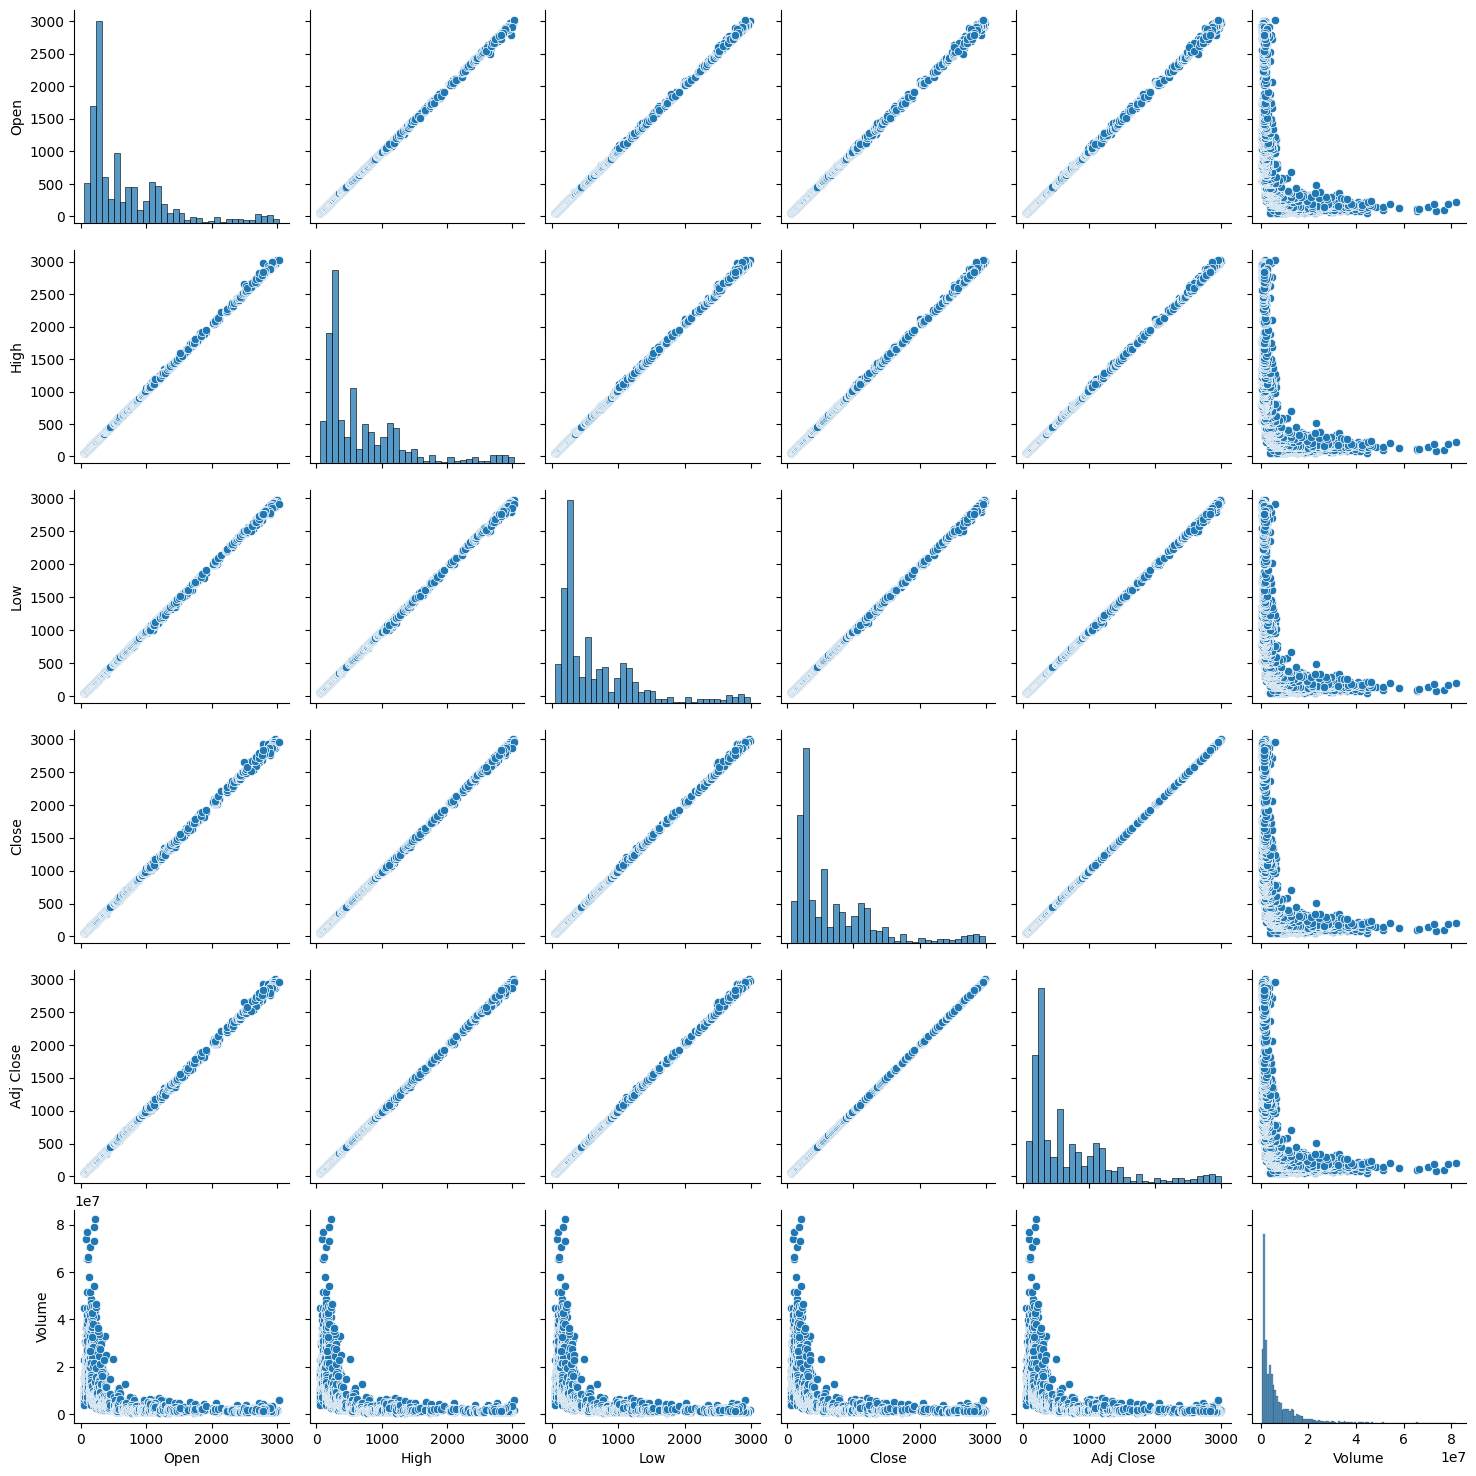

In [23]:
sns.pairplot(df)

<Axes: >

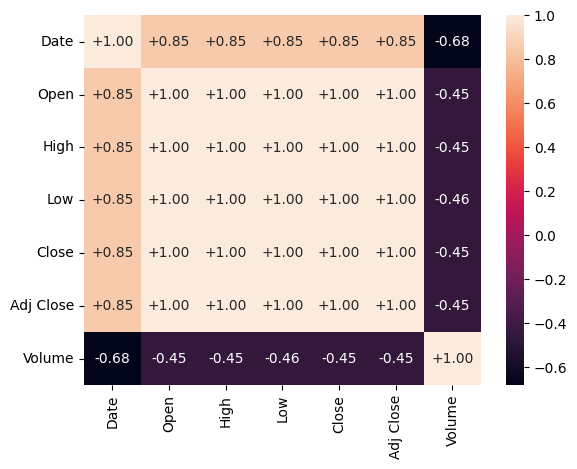

In [7]:
sns.heatmap(df.corr(), annot=True, fmt='+.2f')

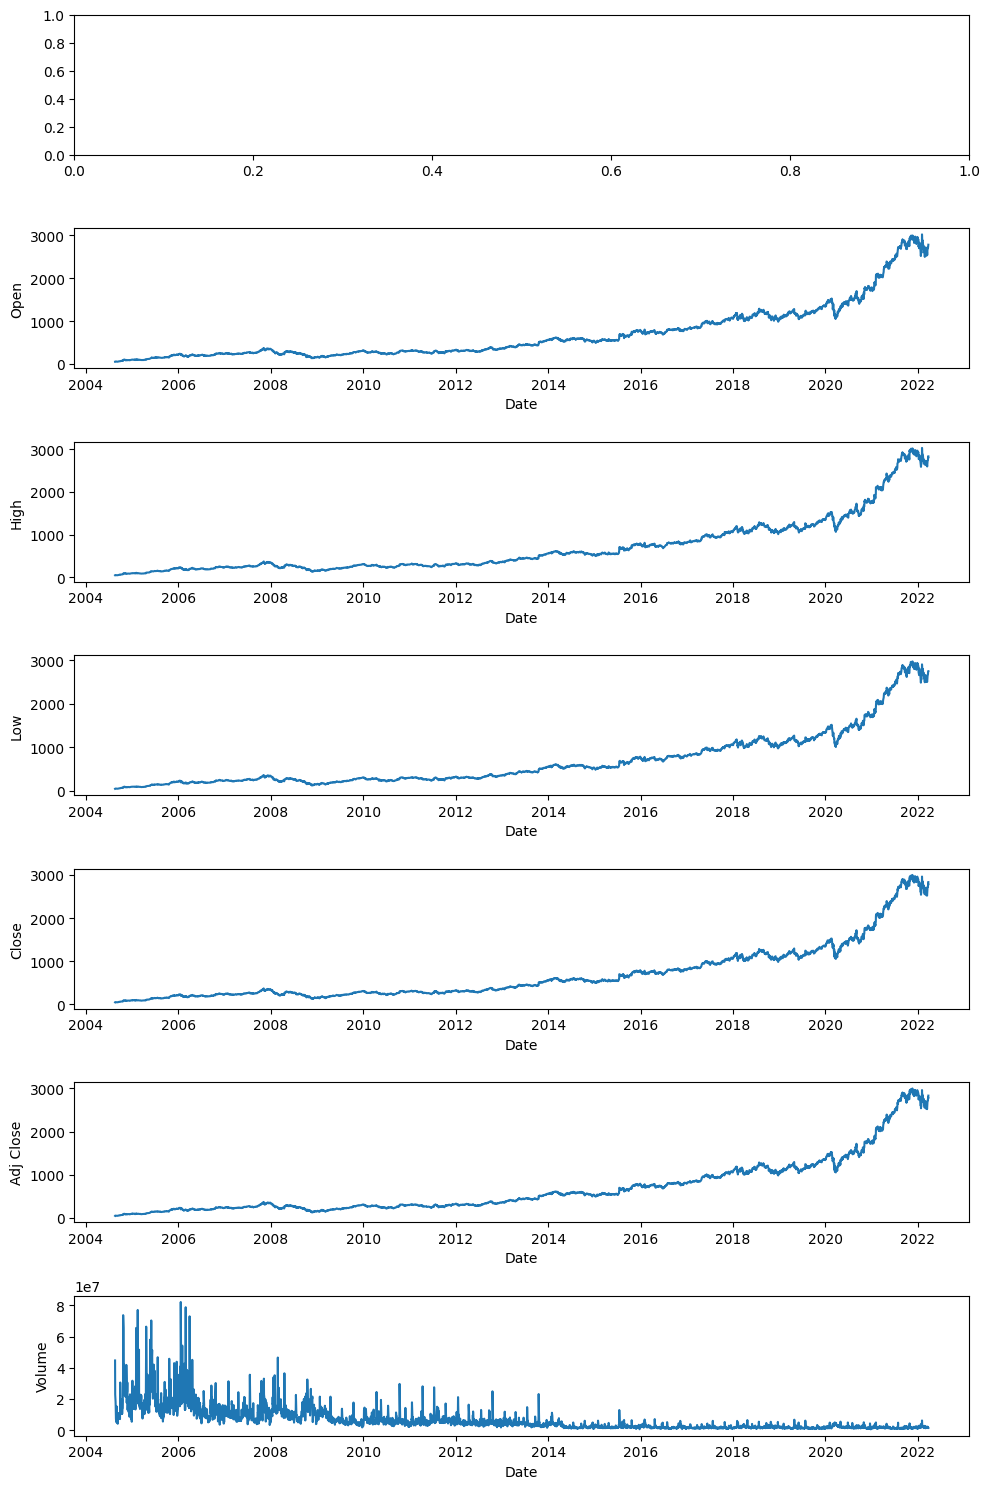

In [41]:
fig = plt.figure(figsize=(10,15))
axs = fig.subplots(nrows=len(df.columns)-1)
for i, col in enumerate(df.columns):
    if col != 'Date':
        sns.lineplot(x=df.Date, y=df[col], ax=axs[i-1])
plt.tight_layout()
fig.show()

Proverava se promena u odnosu na Open kolonu

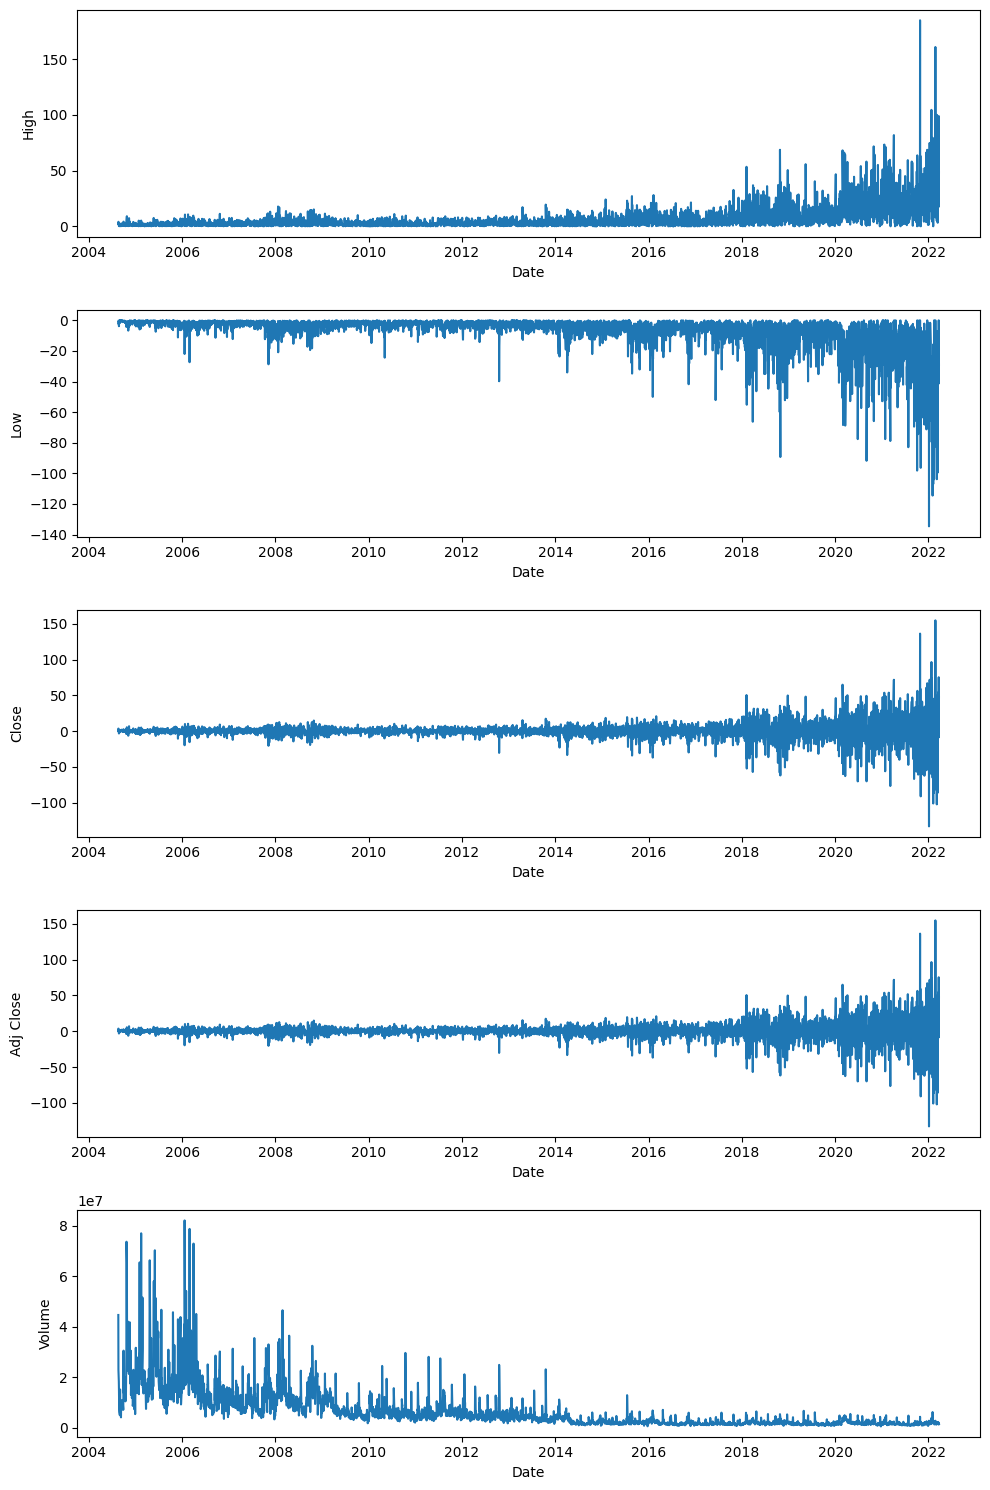

In [52]:
fig = plt.figure(figsize=(10,15))
axs = fig.subplots(nrows=len(df.columns)-2)
for i, col in enumerate(df.columns):
    if col != 'Date' and col != 'Open':
        sns.lineplot(x=df.Date, y=df[col]-df.Open, ax=axs[i-2]).set_ylabel(col)
plt.tight_layout()
fig.show()

In [56]:
(df['Close'] - df['Adj Close']).sum()

0.0

Adj Close == Close, moze sigurno da se izbaci.

Ostatak ipak mozda sadrzi neku informaciju.

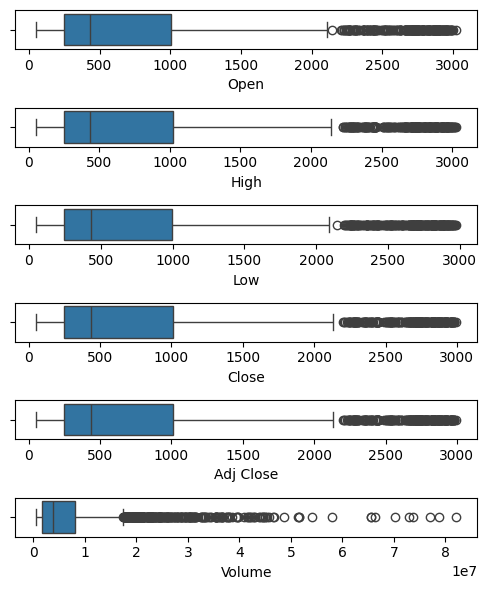

In [67]:
fig = plt.figure(figsize=(5,6))
axs = fig.subplots(nrows=len(df.columns)-1)
for i, col in enumerate(df.columns):
    if col != 'Date':
        sns.boxplot(x=df[col], ax=axs[i-1])
plt.tight_layout()
fig.show()

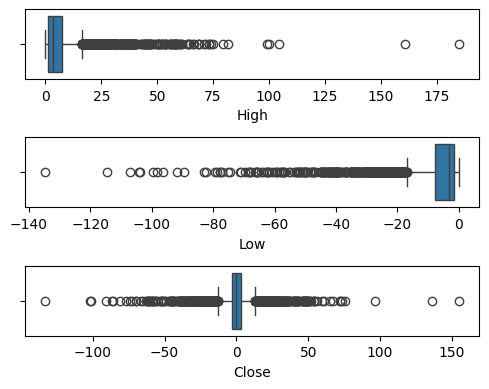

In [119]:
fig = plt.figure(figsize=(5,4))
axs = fig.subplots(nrows=3)
for i, col in enumerate(['High', 'Low', 'Close']):
    sns.boxplot(x=df[col]-df.Open, ax=axs[i]).set_xlabel(col)
plt.tight_layout()
fig.show()

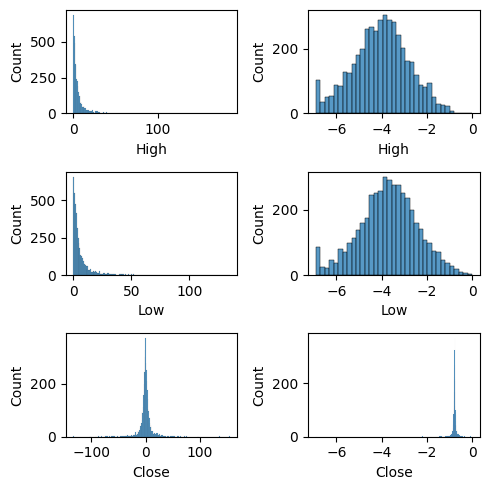

In [109]:
df2 = pd.DataFrame()
df2['High'] = df.High - df.Open
df2['Low'] = -(df.Low - df.Open)
df2['Close'] = df.Close - df.Open
scaler = MinMaxScaler().set_output(transform='pandas')
df3 = scaler.fit_transform(df2)

fig = plt.figure(figsize=(5,5))
axs = fig.subplots(nrows=3, ncols=2)
for i, col in enumerate(df2.columns):
    sns.histplot(x=df2[col], ax=axs[i][0]).set_xlabel(col)
    sns.histplot(x=np.log(df3[col] + 0.001), ax=axs[i][1]).set_xlabel(col)
plt.tight_layout()
fig.show()

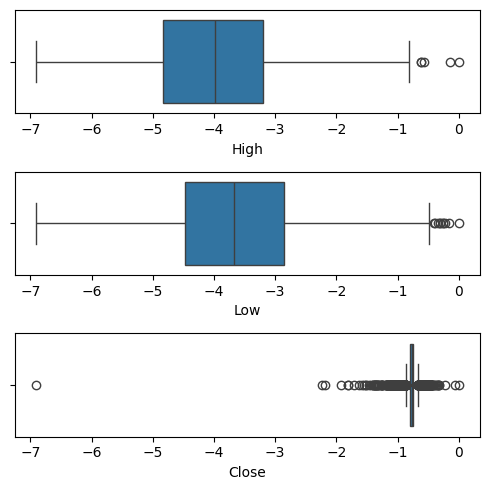

In [110]:
fig = plt.figure(figsize=(5,5))
axs = fig.subplots(nrows=3)
for i, col in enumerate(df3.columns):
    sns.boxplot(x=np.log(df3[col] + 0.001), ax=axs[i]).set_xlabel(col)
plt.tight_layout()
fig.show()

Logaritamska transformacija daje dobru normalnu distribuciju za high and low, manje vise za close.

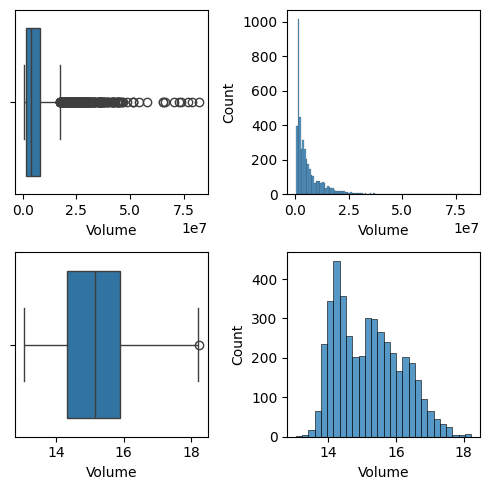

In [118]:
fig = plt.figure(figsize=(5,5))
axs = fig.subplots(nrows=2, ncols=2)
sns.boxplot(x=df.Volume, ax=axs[0][0])
sns.boxplot(x=np.log(df.Volume), ax=axs[1][0])
sns.histplot(x=df.Volume, ax=axs[0][1])
sns.histplot(x=np.log(df.Volume), ax=axs[1][1])
plt.tight_layout()

Isto i za Volume.

## Ponovna provera osnovnih grafova sa promenom u odnosu na Open

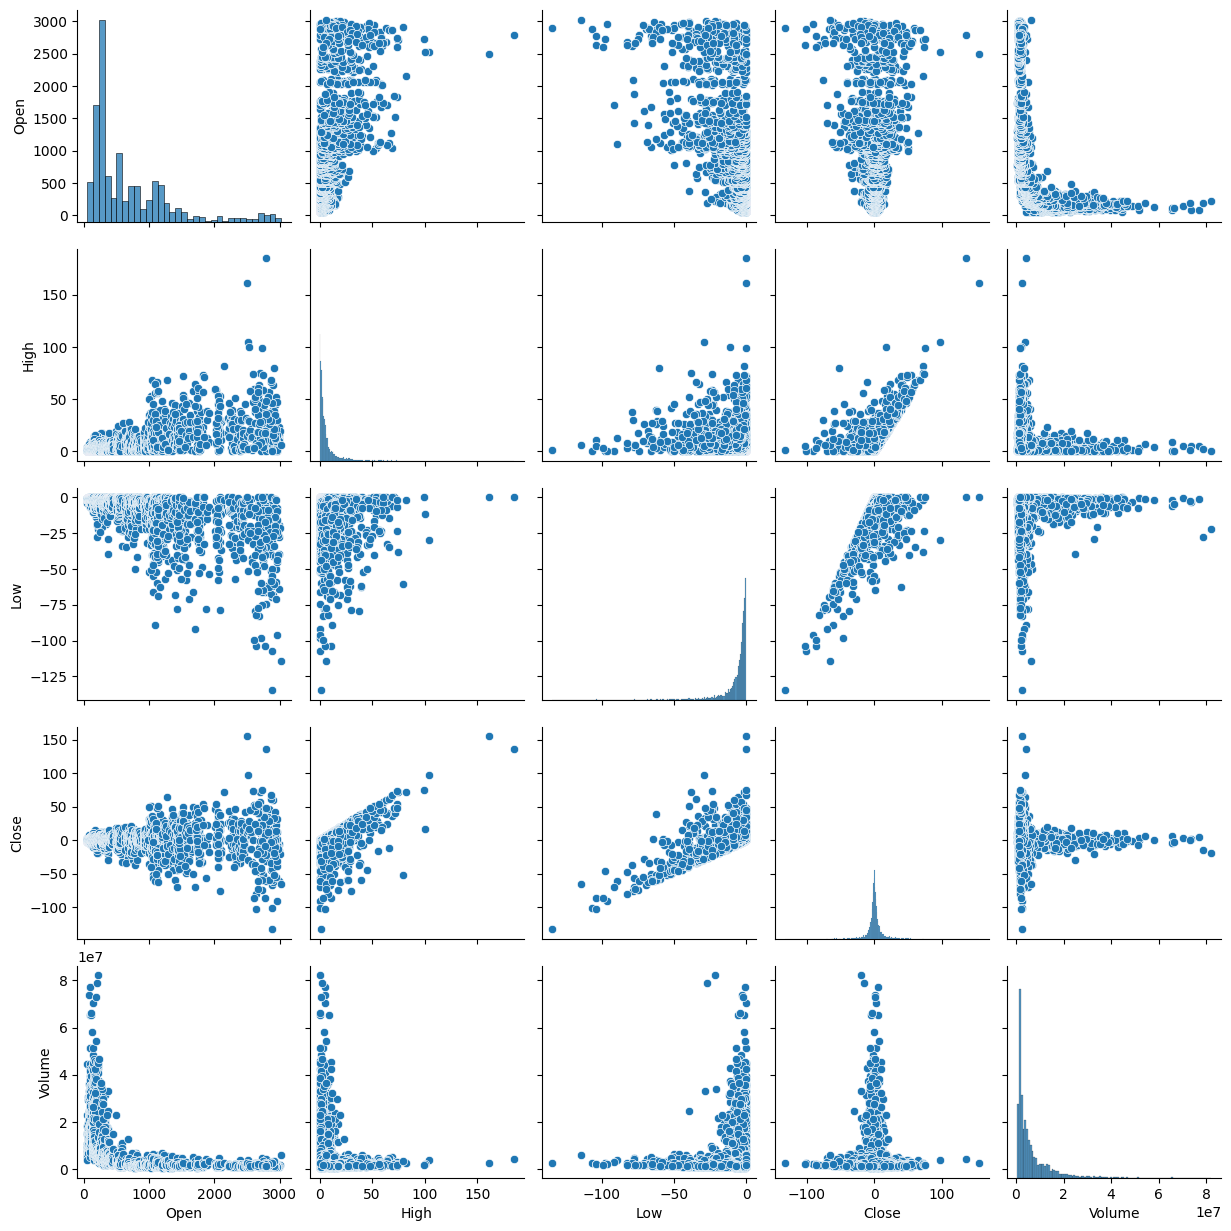

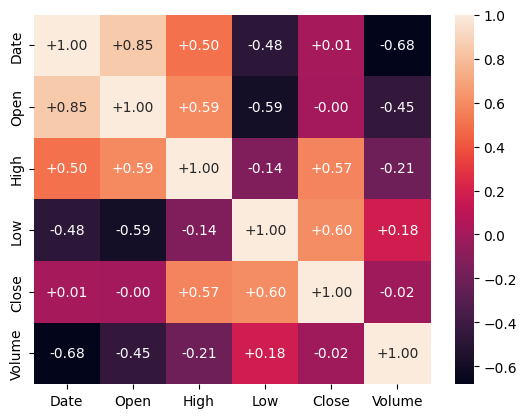

In [127]:
df4 = df.copy()
df4.High = df2.High
df4.Low = -df2.Low
df4.Close = df2.Close
df4.pop('Adj Close')
sns.pairplot(df4)
plt.show()
sns.heatmap(df4.corr(), annot=True, fmt='+.2f')
plt.show()

## Procentualna promena

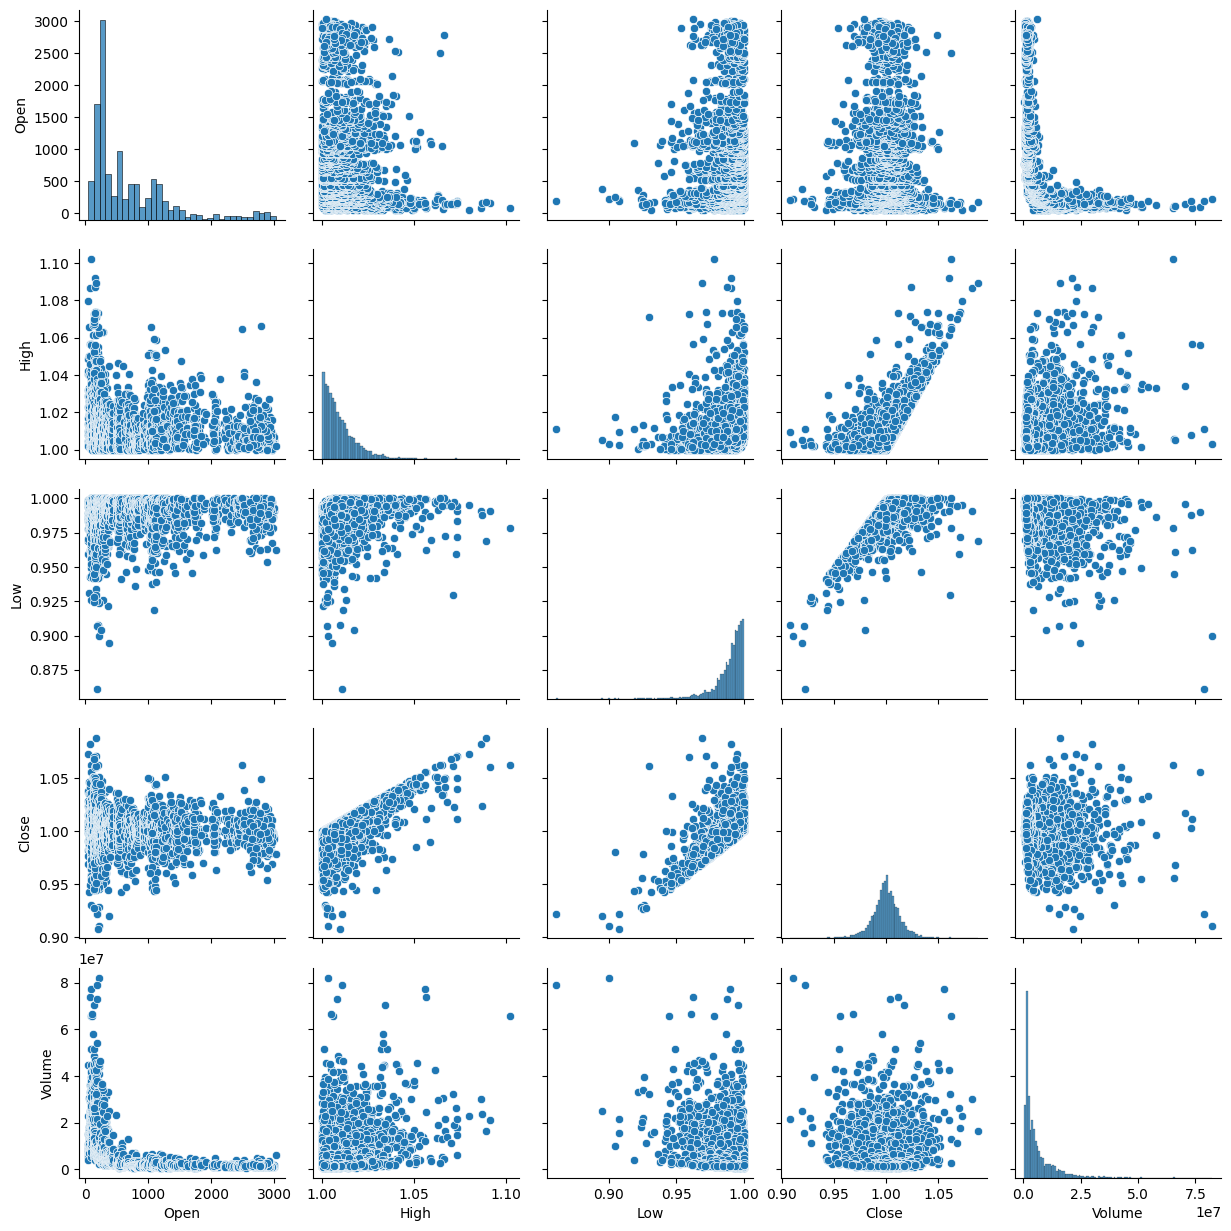

In [129]:
df5 = df.copy()
df5.High = df5.High / df5.Open
df5.Low = df5.Low / df5.Open
df5.Close = df5.Close / df5.Open
df5.pop('Adj Close')
sns.pairplot(df5)

<Axes: >

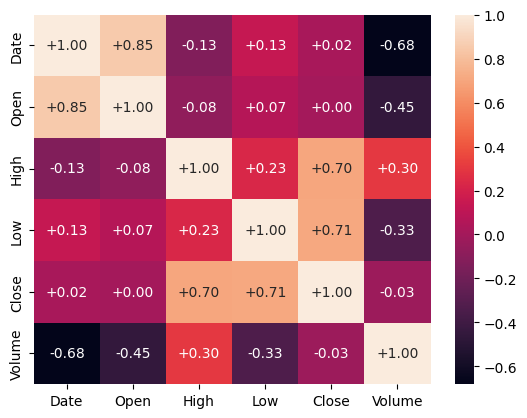

In [133]:
sns.heatmap(df5.corr(), annot=True, fmt='+.2f')

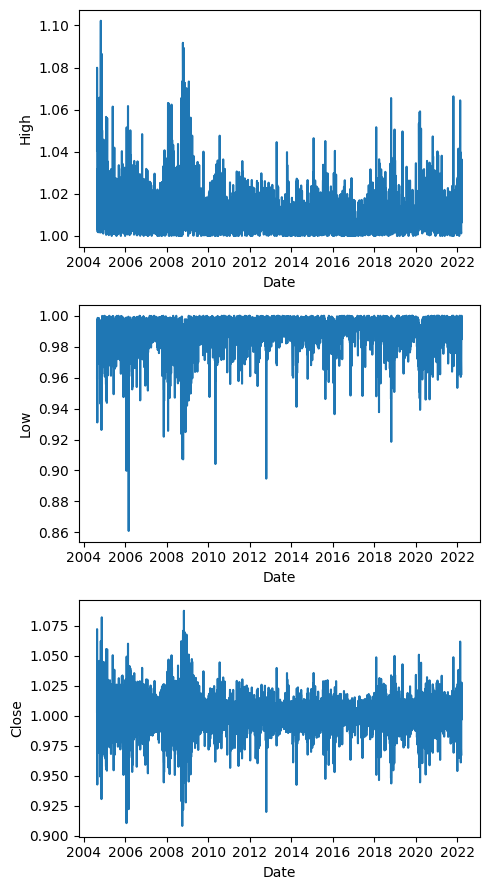

In [132]:
fig = plt.figure(figsize=(5,9))
axs = fig.subplots(nrows=3)
for i, col in enumerate(['High', 'Low', 'Close']):
    sns.lineplot(x=df.Date, y=df5[col], ax=axs[i]).set_ylabel(col)
plt.tight_layout()

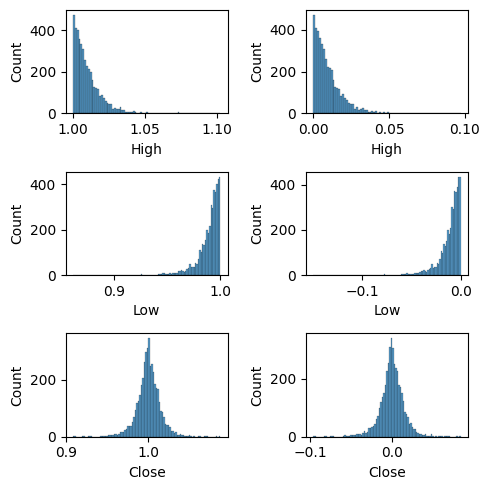

In [144]:
fig = plt.figure(figsize=(5,5))
axs = fig.subplots(nrows=3, ncols=2)
for i, col in enumerate(['High', 'Low', 'Close']):
    sns.histplot(x=df5[col], ax=axs[i][0]).set_xlabel(col)
    sns.histplot(x=np.log(df5[col]), ax=axs[i][1]).set_xlabel(col)
plt.tight_layout()
fig.show()

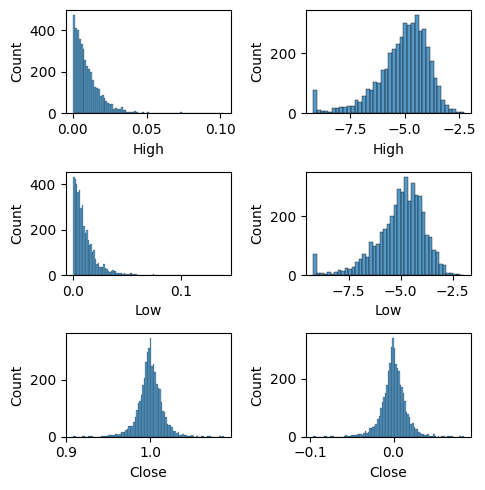

In [158]:
df6 = df5.copy()
df6.High -= 0.9999
df6.Low = 1.0001 - df6.Low
fig = plt.figure(figsize=(5,5))
axs = fig.subplots(nrows=3, ncols=2)
for i, col in enumerate(['High', 'Low', 'Close']):
    sns.histplot(x=df6[col], ax=axs[i][0]).set_xlabel(col)
    sns.histplot(x=np.log(df6[col]), ax=axs[i][1]).set_xlabel(col)
plt.tight_layout()
fig.show()

<Axes: >

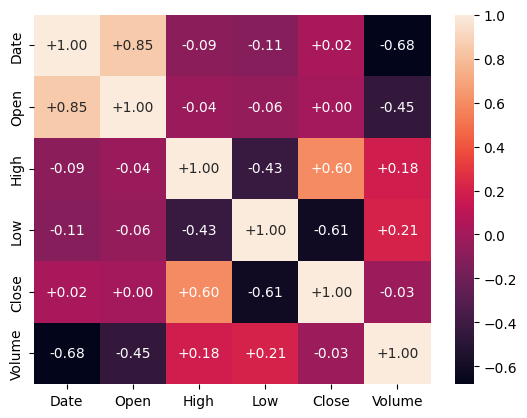

In [160]:
df7 = df6.copy()
df7.High = np.log(df6.High)
df7.Low = np.log(df6.Low)
sns.heatmap(df7.corr(), annot=True, fmt='+.2f')

## Uporedjivanje danasnjeg Open sa jucerasnnjim vrednostima ostalih kolona

<Axes: >

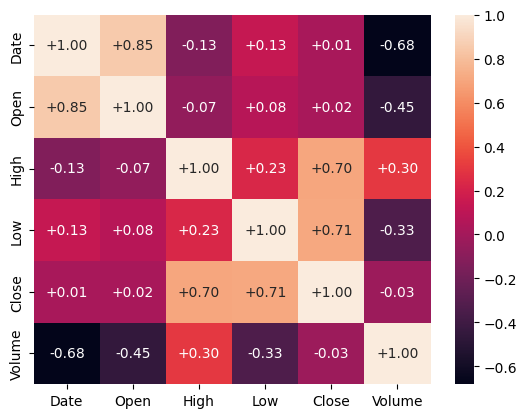

In [181]:
df8 = df5.copy()
df8.Open = df.Open.shift(-1)
df8 = df8.iloc[:-1]
sns.heatmap(df8.corr(), annot=True, fmt='+.2f')

<Axes: >

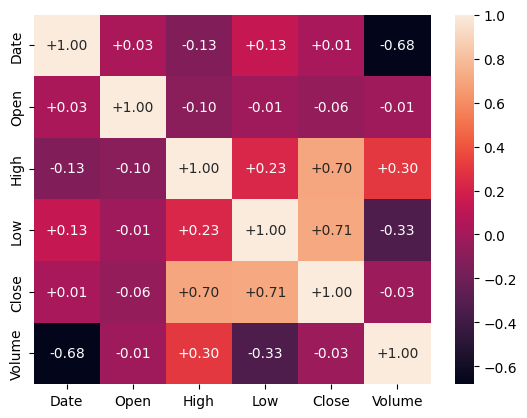

In [185]:
df8 = df5.copy()
df8.Open = df.Open - df.Open.shift(1)
df8 = df8.iloc[:-1]
sns.heatmap(df8.corr(), annot=True, fmt='+.2f')

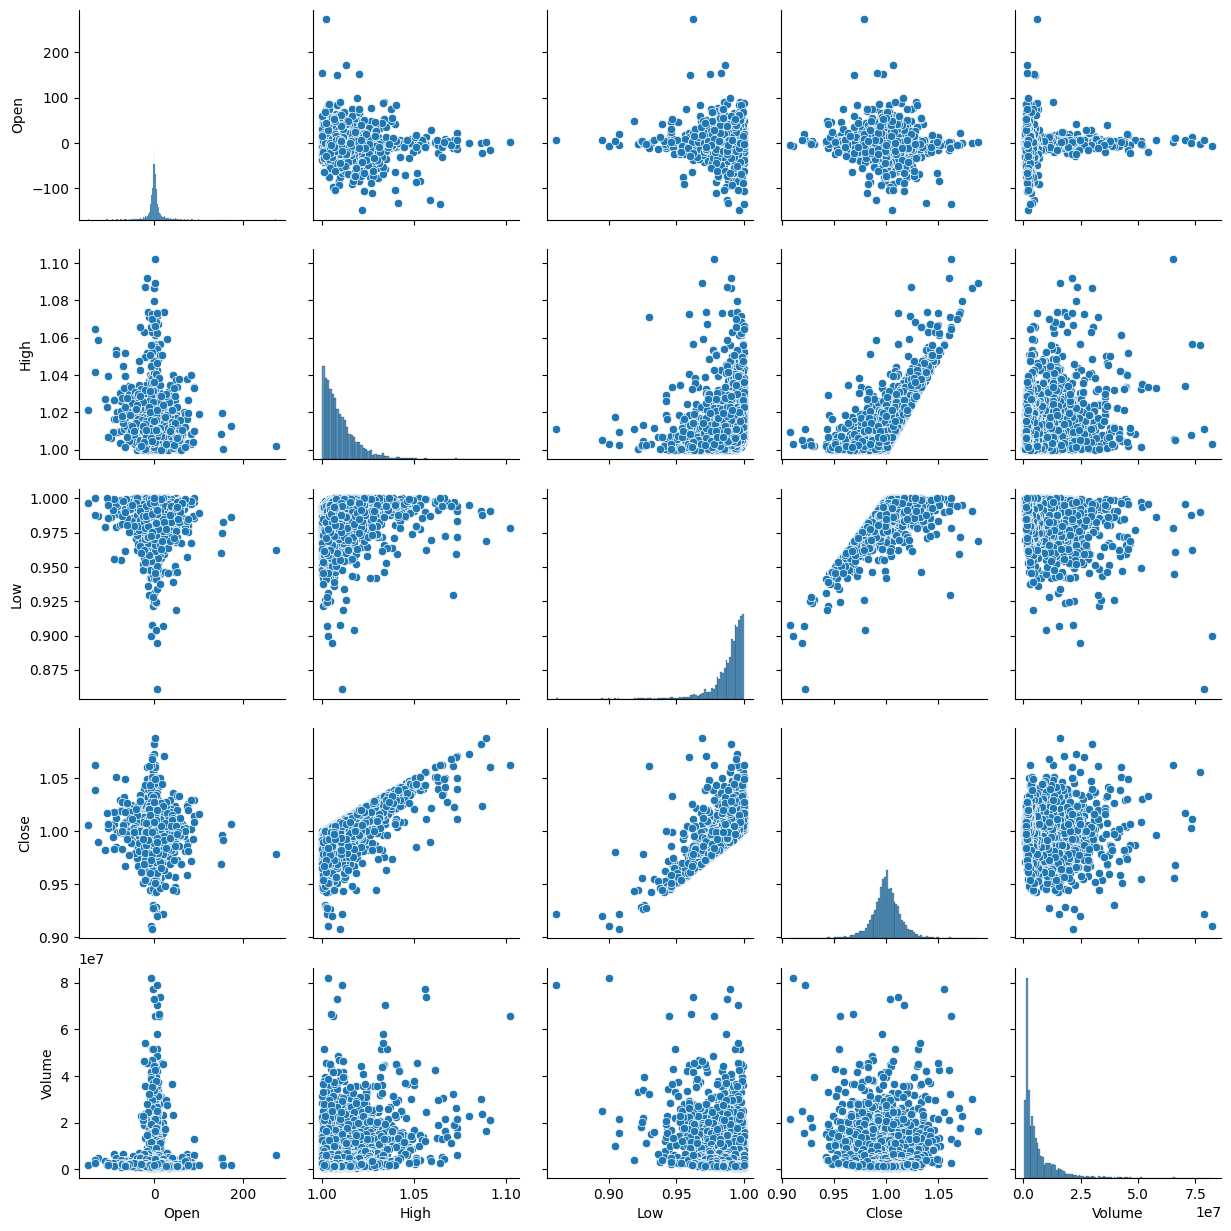

In [186]:
sns.pairplot(df8)